# Fit2Wear

In [1]:
# Load libraries
import os.path
import pandas as pd
os.getcwd() # get path
import numpy as np
%matplotlib inline 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Read data
df = pd.read_json('/Users/priyasharma/Documents/Insight_Program_technical/Data_Challenge/renttherunway_final_data.json',lines=True)


192544

## Data_EDA

In [285]:
all_fit = pd.crosstab(df.category,df.fit).replace(0,np.nan).\
     stack().reset_index().rename(columns={0:'Time'})
truest = all_fit.query('fit in ("fit")').sort_values(by='Time', ascending=False)
not_truest = all_fit.query('fit in ("large") | fit in ("small")').sort_values(by='Time', ascending=False)
smallest = all_fit.query('fit in ("small")').sort_values(by='Time', ascending=False)
largest = all_fit.query('fit in ("large")').sort_values(by='Time', ascending=False)

truest.head()

,category,fit,Time
39,dress,fit,66567.0
49,gown,fit,35177.0
112,sheath,fit,14549.0
62,jumpsuit,fit,3866.0
115,shift,fit,3667.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

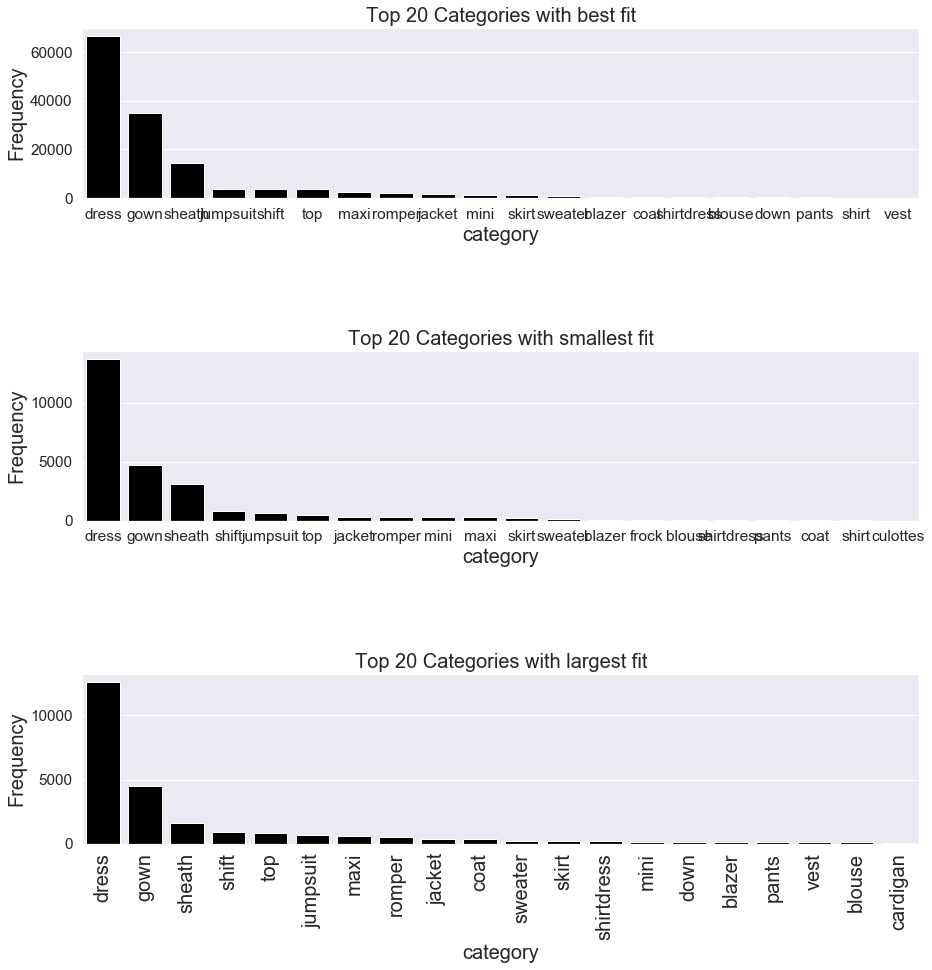

In [291]:
fig = plt.figure(figsize=(15,15))

plt.subplots_adjust(hspace  =  0.9)

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(311)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(312)

ax3 = fig.add_subplot(313)

sns.barplot(x="category", y="Time",
            data=truest[:20], color='black',ax=ax1);
ax1.set_title('Top 20 Categories with best fit',fontsize=20)
ax1.set_ylabel('Frequency', fontsize=20)
ax1.set_xlabel('category', fontsize=20)
plt.xticks(rotation=90,fontsize=20)


sns.barplot(x="category", y="Time",
            data=smallest[:20], color='black',ax=ax2);
ax2.set_title('Top 20 Categories with smallest fit',fontsize=20)
ax2.set_ylabel('Frequency', fontsize=20)
ax2.set_xlabel('category', fontsize=20)
plt.xticks(rotation=90,fontsize=20)


sns.barplot(x="category", y="Time",
            data=largest[:20], color='black',ax=ax3);
ax3.set_title('Top 20 Categories with largest fit',fontsize=20)
ax3.set_ylabel('Frequency', fontsize=20)
ax3.set_xlabel('category', fontsize=20)
plt.xticks(rotation=90,fontsize=20)

# Question: Which items have the truest fit? What does that mean?¶

In [124]:
def percent_fit_count(df,by='item_id'):
    # find the total number of item id
    total_count_item_id = df[by].value_counts().reset_index() 
    total_count_item_id.columns = [by,'Total']

    # find the 'fit' in fit for all item_id
    fitted_item_id= df[df['fit']=='fit']
    fitted_item_id = fitted_item_id[by].value_counts().reset_index()
    fitted_item_id.columns = [by,'Fit_only']

    # merge data 

    df_new_truest_fit = pd.merge(total_count_item_id,fitted_item_id,on = by)

    # Calculate Percentage of truest fit
    df_new_truest_fit['Percent_true_rate'] = (df_new_truest_fit['Fit_only']/df_new_truest_fit['Total']*100)
    df_new_truest_fit = df_new_truest_fit.sort_values(by = 'Percent_true_rate',ascending = False)
    
    return df_new_truest_fit

truest_fit_by_item_id = percent_fit_count(df,by='item_id')

In [125]:
df_new_truest_fit_by_highest_total = truest_fit_by_item_id[truest_fit_by_item_id['Total']>=100].sort_values(by = 'Total',ascending = False)

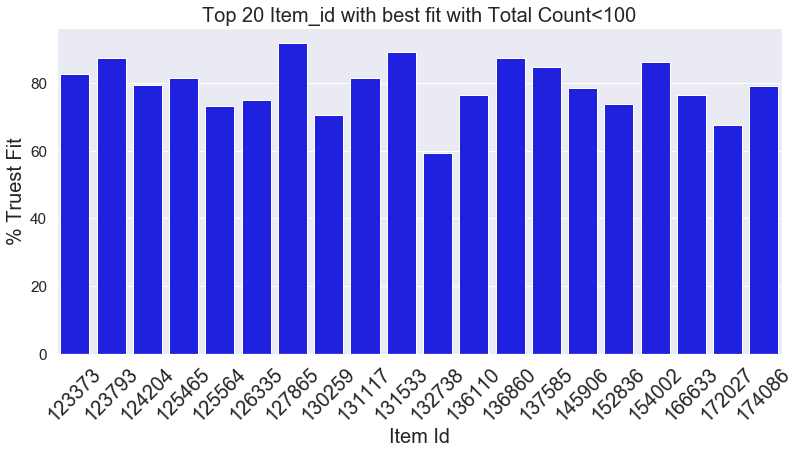

In [292]:
plt.figure(figsize=(13, 6))
sns.barplot(x="item_id", y="Percent_true_rate",
            data=df_new_truest_fit_by_highest_total[:20], color='blue');
plt.title('Top 20 Item_id with best fit with Total Count<100',fontsize=20)
plt.ylabel('% Truest Fit', fontsize=20)
plt.xlabel('Item Id', fontsize=20)
plt.xticks(rotation=45,fontsize=20)
plt.show()

# Q2: Are some categories of clothing more significantly more prone to have ill-fitting clothes?

In [294]:
len(df.category.unique())

68

In [127]:
truest_item_by_category= percent_fit_count(df,by='category')

In [141]:
df_by_cat_truest_fit_by_highest_total = truest_item_by_category.sort_values(by = 'Percent_true_rate',ascending = True)

In [295]:
len(df_by_cat_truest_fit_by_highest_total)

66

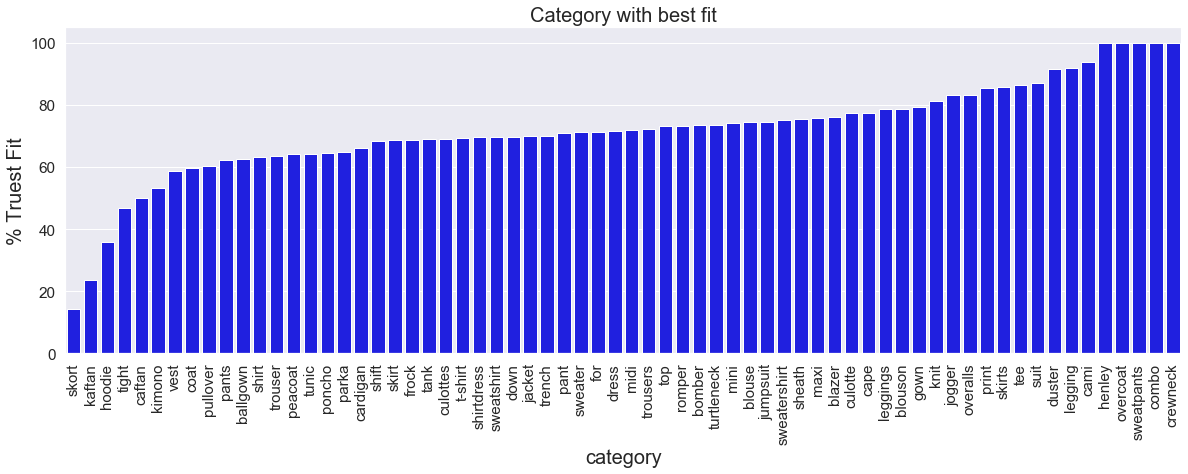

In [296]:
plt.figure(figsize=(20, 6))
sns.barplot(x="category", y="Percent_true_rate",
            data=df_by_cat_truest_fit_by_highest_total[:], color='blue');
plt.title('Category with best fit',fontsize=20)
plt.ylabel('% Truest Fit', fontsize=20)
plt.xlabel('category', fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [151]:
df_by_cat_truest_fit_by_highest_total.sort_values(by='Total',ascending=False)

,category,Total,Fit_only,Percent_true_rate
0,dress,92884,66567,71.666810
1,gown,44381,35177,79.261396
2,sheath,19316,14549,75.320977
3,shift,5365,3667,68.350419
4,jumpsuit,5184,3866,74.575617
5,top,4931,3608,73.169742
6,maxi,3443,2605,75.660761
7,romper,3070,2248,73.224756
8,jacket,2404,1681,69.925125
9,mini,1751,1300,74.243290


# Build a model that empowers a user to discover whether a given item at a given size is likely to fit loosely, well, or tightly.

In [154]:
df

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116.0,NaN,NaN,sheath,fit,"5' 4""",1063761,10.0,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs
5,45.0,athletic,32b,dress,fit,"5' 8""",364092,8.0,date,"April 30, 2016",Traditional with a touch a sass,Didn't actually wear it. It fit perfectly. The...,8,734848,138lbs
6,27.0,hourglass,34c,dress,fit,"5' 3""",568429,10.0,everyday,"December 7, 2017",LITERALLY THE CUTEST DRESS EVER,This dress is so sweet. I loved the print. The...,4,336066,112lbs
7,65.0,full bust,34d+,dress,fit,"5' 3""",130259,10.0,formal affair,"January 1, 2013","Great dress, beautifully made. I received lot...",Fit was great. Maybe a little tight under the ...,8,86661,118lbs
8,27.0,full bust,36d,gown,fit,"5' 6""",1729232,10.0,formal affair,"June 27, 2016",Great for black tie event!,I was nervous of it looking cheap when it arri...,21,166228,NaN
9,33.0,petite,32b,gown,fit,"5' 3""",1729232,10.0,formal affair,"October 17, 2016",This dress was everything! It was perfect for ...,The dress was very flattering and fit perfectl...,1,154309,114lbs


In [217]:
#Select fetaures and Remove Nans
df_model = df.copy()

cols= ['age','body type','bust size','category','fit','height','item_id','rating','size','weight']
df_model = df_model[cols].dropna()

In [218]:
# remove units for weight

df_model['weight'] = df_model['weight'].str.strip('lbs')
df_model['weight'] = df_model['weight'].astype(int)
df_model['rating'] = df_model['rating'].astype(int)
df_model['age'] = df_model['age'].astype(int)

In [219]:
def feet_to_inches(h):  
    h_feet = h.split("'")
    h_inches = float(h_feet[0]) + float(h_feet[1].replace('"', '')) / 12.0
    return h_inches

df_model['height'] = df_model['height'].apply(lambda x:feet_to_inches(x))

In [310]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
categorical_feats = ['body type','bust size','category','fit','item_id']
df_model[categorical_feats] = df_model[categorical_feats].apply(lambda col: class_le.fit_transform(col))

X = df_model.drop(['fit'],axis = 1)
y = df_model['fit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

clf = lgb.LGBMClassifier(boosting_type= 'gbdt',
                         objective = 'multiclass',
                         n_jobs = 3, 
                         subsample = 0.5,
                         reg_alpha = 2,
                         reg_lambda = 1
                         silent = False,
                         num_leaves = 100,
                         num_class = 4,
                         min_child_samples = 150,
                         min_child_weight = 0.1)

clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_samples=150,
               min_split_gain=0.0, min_weight=0.1, n_estimators=100, n_jobs=3,
               num_class=4, num_leaves=100, objective='multiclass',
               random_state=None, reg_alpha=2, reg_lambda=1, silent=False,
               subsample=0.5, subsample_for_bin=200000, subsample_freq=0)

In [311]:
y_predict = clf.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, y_predict))
y_predict = clf.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, y_predict))

Test Accuracy:  0.7473016913954695
Train Accuracy:  0.7611188530936052


In [312]:
len(y_predict)

109791

In [313]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

Confusion matrix, without normalization
[[79702   460   587]
 [12117  1867   318]
 [12534   211  1995]]
Normalized confusion matrix
[[0.99 0.01 0.01]
 [0.85 0.13 0.02]
 [0.85 0.01 0.14]]


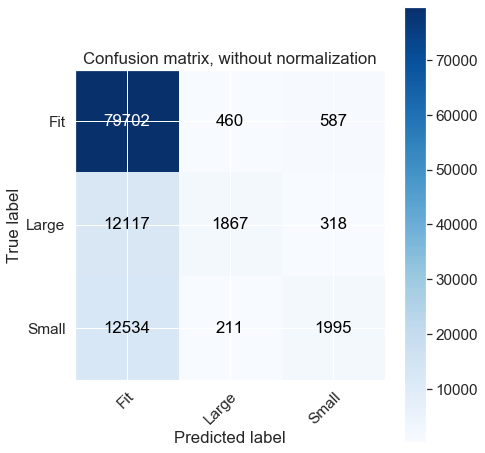

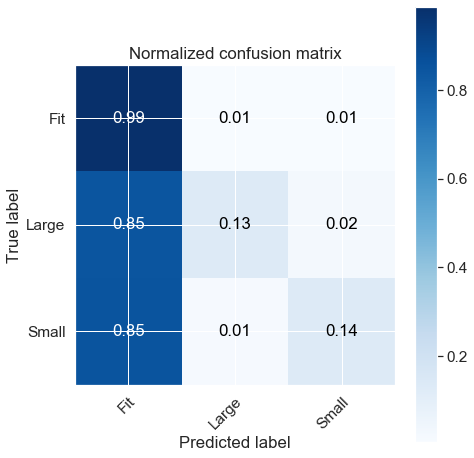

In [314]:
# Code Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = ['Fit','Large','Small']

# Plot non-normalized confusion matrix

plot_confusion_matrix(y_train, y_predict, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_predict, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [315]:
print(classification_report(y_train, y_predict, target_names=class_names))

              precision    recall  f1-score   support

         Fit       0.76      0.99      0.86     80749
       Large       0.74      0.13      0.22     14302
       Small       0.69      0.14      0.23     14740

    accuracy                           0.76    109791
   macro avg       0.73      0.42      0.44    109791
weighted avg       0.75      0.76      0.69    109791



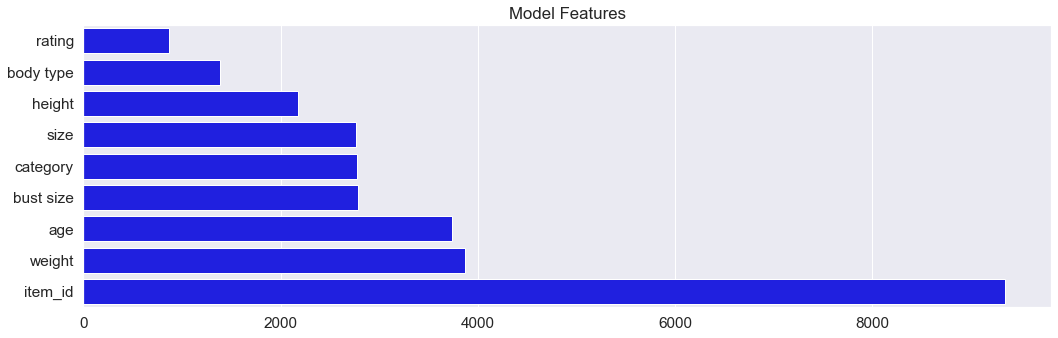

In [324]:
feature_imp = pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True)
feature_imp


plt.figure(figsize=(15, 5))
sns.barplot(y=feature_imp.index, x=feature_imp,color='blue')
plt.title('Model Features')
plt.tight_layout()
plt.show()

## How would you design a model that also takes in a user’s previous history into making your decision? If time permits, build this. 

In [276]:
class_le = LabelEncoder()
categorical_feats = ['body type','bust size','category','fit','item_id']
df_model[categorical_feats] = df_model[categorical_feats].apply(lambda col: class_le.fit_transform(col))

feature_cols = ['item_id','rating','size','category']
X = df_model[feature_cols]
y = df_model['fit']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=150, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=100, n_jobs=3, num_class=3, num_leaves=300,
               objective='multiclass', random_state=None, reg_alpha=2,
               reg_lambda=1, silent=True, subsample=0.5,
               subsample_for_bin=200000, subsample_freq=0)

In [277]:
y_predict = clf.predict(X_test)
print('Test Accuracy: ', accuracy_score(y_test, y_predict))
y_predict = clf.predict(X_train)
print('Train Accuracy: ', accuracy_score(y_train, y_predict))

Test Accuracy:  0.7426018526108698
Train Accuracy:  0.7508994362015101


Confusion matrix, without normalization
[[79038   794   917]
 [12372  1617   313]
 [12701   252  1787]]
Normalized confusion matrix
[[0.98 0.01 0.01]
 [0.87 0.11 0.02]
 [0.86 0.02 0.12]]


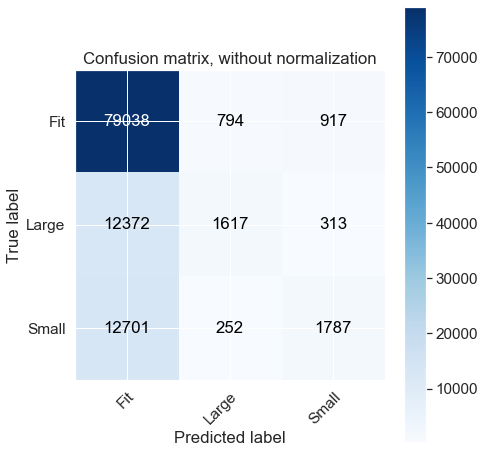

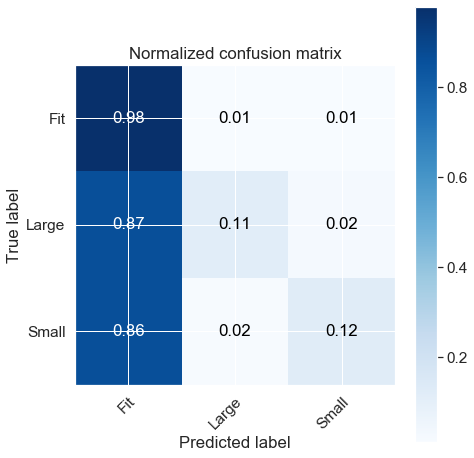

In [278]:
# Plot non-normalized confusion matrix

plot_confusion_matrix(y_train, y_predict, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_train, y_predict, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()



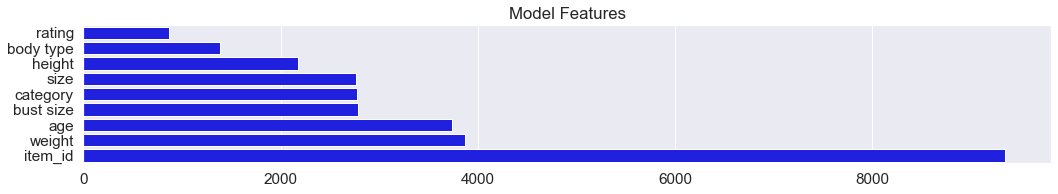

In [322]:
feature_imp = pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True)
feature_imp


plt.figure(figsize=(15, 3))
sns.barplot(y=feature_imp.index, x=feature_imp,color='blue')
plt.title('Model Features')
plt.tight_layout()
plt.show()

In [318]:
list(df.head())

['age',
 'body type',
 'bust size',
 'category',
 'fit',
 'height',
 'item_id',
 'rating',
 'rented for',
 'review_date',
 'review_summary',
 'review_text',
 'size',
 'user_id',
 'weight']